# DATA620: Week 3 Assignment
#### by Glen Davis & Brett Davidoff

In [ ]:
import io
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random
import requests
import scipy as sp

## Introduction

We load node and edge data from https://networkrepository.com/fb-pages-tvshow.php for mutually liked verified Facebook pages related to certain TV shows, originally collected in November 2017. Nodes represent TV show pages, and edges represent mutual likes among them. We eliminate pages with non-ASCII characters in their names, then take a small subset of the remaining pages for analysis and visualization. From this subset, we also eliminate any pages that are in isolation, i.e. those not connected to other pages by any mutual likes.

In [ ]:
random.seed(1006)
fn_nodes = "https://raw.githubusercontent.com/geedoubledee/data620_week3assignment/main/fb-pages-tvshow.nodes"
nodes_df = pd.read_csv(fn_nodes)
subset = ["name", "new_id"]
nodes_df = nodes_df[subset]
def check_chars(s):
    return s.isascii()
nodes_df["chars_okay"] = nodes_df["name"].apply(check_chars)
nodes_df = nodes_df[nodes_df["chars_okay"] == True]
nodes_df.sort_values(by="new_id", inplace=True)
nodes_dict = dict(zip(nodes_df.new_id, nodes_df.name))
fn_edges = "https://raw.githubusercontent.com/geedoubledee/data620_week3assignment/main/fb-pages-tvshow.edges"
resp = requests.get(fn_edges)
G = nx.read_edgelist(io.BytesIO(resp.content), delimiter=",", nodetype=int)
subset = random.sample(list(nodes_df["new_id"]), 100)
H = G.subgraph(subset)
I = H.copy()
I.remove_nodes_from(list(nx.isolates(H)))
I = nx.relabel_nodes(I, nodes_dict)

Below is a visualization of the subset of connected TV pages we've selected. We will refer to this graph as subgraph I.

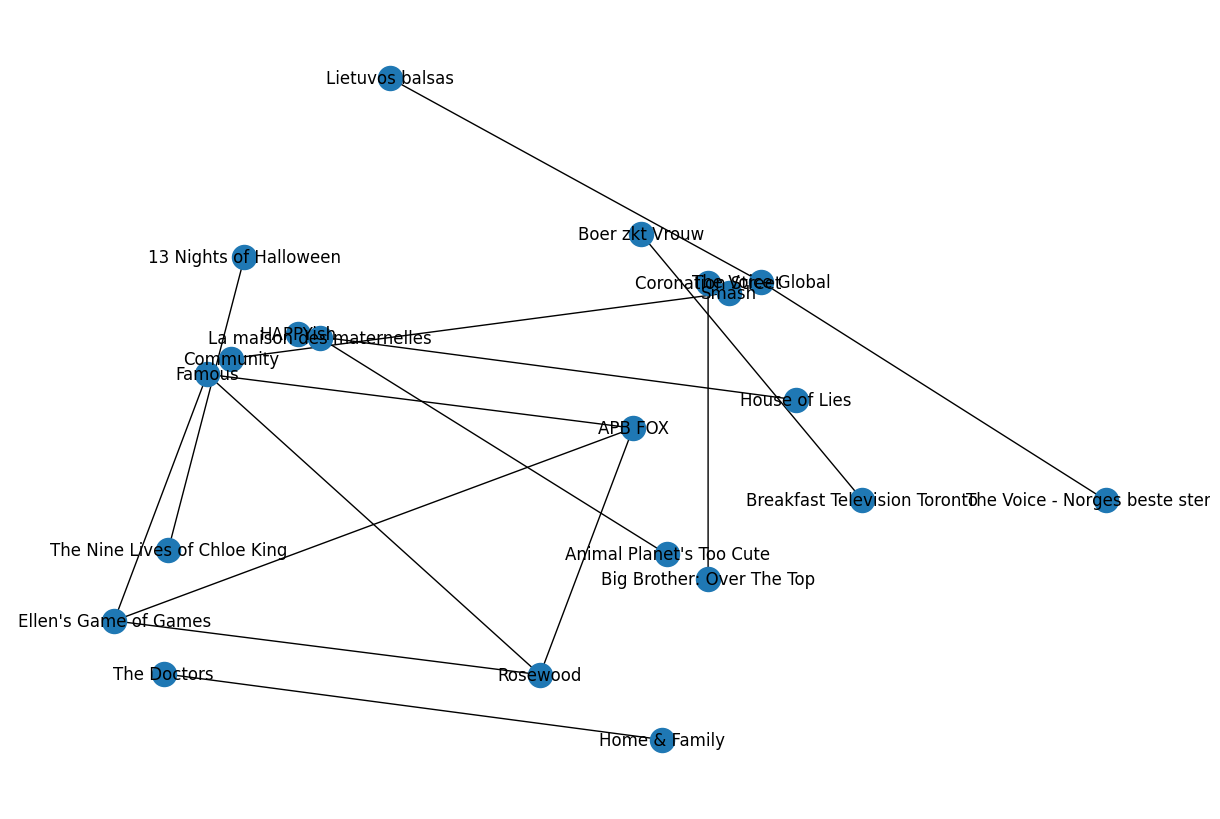

In [ ]:
plt.figure(figsize=(12,8))
nx.draw_kamada_kawai(I, with_labels=True)
plt.show()

We can't calculate the diameter of subgraph I pictured above because it is not connected. However, we can calculate the diameter of the original connected graph G:

The diameter of the original connected graph G is 20.

In [ ]:
#density
density = nx.density(G)
density

In [ ]:
#degree centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality

In [ ]:

#diameter
diameter = nx.diameter(G, usebounds = False)
diameter

20